<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.849999,28.115667,52.384670,41.971608,-7.641995,193.679949,197.895892,-4.215943
1,0.0,1.0,77.481088,25.208490,26.918671,84.706973,-10.850982,213.464240,226.089661,-12.625420
2,0.0,2.0,99.634044,25.047451,20.932438,27.904199,8.966091,192.484224,176.685525,15.798699
3,0.0,3.0,58.176823,82.464060,29.561567,47.350342,4.903684,232.456476,216.263561,16.192915
4,0.0,4.0,56.442929,35.225975,63.740764,25.411469,-11.419727,179.401410,183.670213,-4.268803
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.758136,56.540160,63.426370,33.885191,-1.764956,199.844902,197.635561,2.209340
29996,999.0,26.0,84.092365,53.206172,96.928304,38.684647,-8.057317,274.854172,275.416386,-0.562214
29997,999.0,27.0,54.748936,86.362589,57.448120,45.422415,6.348869,260.330930,251.511323,8.819607
29998,999.0,28.0,24.288372,40.037930,31.648440,72.898037,-5.253671,173.619108,179.832773,-6.213666


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.849999,28.115667,52.384670,41.971608,-7.641995,193.679949,197.895892,-4.215943
1,0.0,1.0,77.481088,25.208490,26.918671,84.706973,-10.850982,213.464240,226.089661,-12.625420
2,0.0,2.0,99.634044,25.047451,20.932438,27.904199,8.966091,192.484224,176.685525,15.798699
3,0.0,3.0,58.176823,82.464060,29.561567,47.350342,4.903684,232.456476,216.263561,16.192915
4,0.0,4.0,56.442929,35.225975,63.740764,25.411469,-11.419727,179.401410,183.670213,-4.268803
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.758136,56.540160,63.426370,33.885191,-1.764956,199.844902,197.635561,2.209340
29996,999.0,26.0,84.092365,53.206172,96.928304,38.684647,-8.057317,274.854172,275.416386,-0.562214
29997,999.0,27.0,54.748936,86.362589,57.448120,45.422415,6.348869,260.330930,251.511323,8.819607
29998,999.0,28.0,24.288372,40.037930,31.648440,72.898037,-5.253671,173.619108,179.832773,-6.213666


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    68.849999  28.115667  52.384670  41.971608  -7.641995   
      1.0    77.481088  25.208490  26.918671  84.706973 -10.850982   
      2.0    99.634044  25.047451  20.932438  27.904199   8.966091   
      3.0    58.176823  82.464060  29.561567  47.350342   4.903684   
      4.0    56.442929  35.225975  63.740764  25.411469 -11.419727   
...                ...        ...        ...        ...        ...   
999.0 25.0   37.758136  56.540160  63.426370  33.885191  -1.764956   
      26.0   84.092365  53.206172  96.928304  38.684647  -8.057317   
      27.0   54.748936  86.362589  57.448120  45.422415   6.348869   
      28.0   24.288372  40.037930  31.648440  72.898037  -5.253671   
      29.0   20.164561  53.755854  77.966980  51.208305  -2.078570   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    193.679949  197.895892  -4.215943  
      1.0    213.464240  226.089661 -12.625420  
      2.0    192.484224  176.685525  15.798699  
      3.0    232.456476  216.263561  16.192915  
      4.0    179.401410  183.670213  -4.268803  
...                 ...         ...        ...  
999.0 25.0   199.844902  197.635561   2.209340  
      26.0   274.854172  275.416386  -0.562214  
      27.0   260.330930  251.511323   8.819607  
      28.0   173.619108  179.832773  -6.213666  
      29.0   211.017129  212.996487  -1.979358  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    68.849999  28.115667  52.384670  41.971608  -7.641995   
      1.0    77.481088  25.208490  26.918671  84.706973 -10.850982   
      2.0    99.634044  25.047451  20.932438  27.904199   8.966091   
      3.0    58.176823  82.464060  29.561567  47.350342   4.903684   
      4.0    56.442929  35.225975  63.740764  25.411469 -11.419727   
...                ...        ...        ...        ...        ...   
999.0 25.0   37.758136  56.540160  63.426370  33.885191  -1.764956   
      26.0   84.092365  53.206172  96.928304  38.684647  -8.057317   
      27.0   54.748936  86.362589  57.448120  45.422415   6.348869   
      28.0   24.288372  40.037930  31.648440  72.898037  -5.253671   
      29.0   20.164561  53.755854  77.966980  51.208305  -2.078570   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    193.679949  197.895892  -4.215943  
      1.0    213.464240  226.089661 -12.625420  
      2.0    192.484224  176.685525  15.798699  
      3.0    232.456476  216.263561  16.192915  
      4.0    179.401410  183.670213  -4.268803  
...                 ...         ...        ...  
999.0 25.0   199.844902  197.635561   2.209340  
      26.0   274.854172  275.416386  -0.562214  
      27.0   260.330930  251.511323   8.819607  
      28.0   173.619108  179.832773  -6.213666  
      29.0   211.017129  212.996487  -1.979358  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.849999,28.115667,52.384670,41.971608,-7.641995,193.679949,197.895892,-4.215943
1,0.0,1.0,77.481088,25.208490,26.918671,84.706973,-10.850982,213.464240,226.089661,-12.625420
2,0.0,2.0,99.634044,25.047451,20.932438,27.904199,8.966091,192.484224,176.685525,15.798699
3,0.0,3.0,58.176823,82.464060,29.561567,47.350342,4.903684,232.456476,216.263561,16.192915
4,0.0,4.0,56.442929,35.225975,63.740764,25.411469,-11.419727,179.401410,183.670213,-4.268803
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.758136,56.540160,63.426370,33.885191,-1.764956,199.844902,197.635561,2.209340
29996,999.0,26.0,84.092365,53.206172,96.928304,38.684647,-8.057317,274.854172,275.416386,-0.562214
29997,999.0,27.0,54.748936,86.362589,57.448120,45.422415,6.348869,260.330930,251.511323,8.819607
29998,999.0,28.0,24.288372,40.037930,31.648440,72.898037,-5.253671,173.619108,179.832773,-6.213666


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    68.849999  28.115667  52.384670  41.971608  -7.641995   
      1.0    77.481088  25.208490  26.918671  84.706973 -10.850982   
      2.0    99.634044  25.047451  20.932438  27.904199   8.966091   
      3.0    58.176823  82.464060  29.561567  47.350342   4.903684   
      4.0    56.442929  35.225975  63.740764  25.411469 -11.419727   
...                ...        ...        ...        ...        ...   
999.0 25.0   37.758136  56.540160  63.426370  33.885191  -1.764956   
      26.0   84.092365  53.206172  96.928304  38.684647  -8.057317   
      27.0   54.748936  86.362589  57.448120  45.422415   6.348869   
      28.0   24.288372  40.037930  31.648440  72.898037  -5.253671   
      29.0   20.164561  53.755854  77.966980  51.208305  -2.078570   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    193.679949  197.895892  -4.215943  
      1.0    213.464240  226.089661 -12.625420  
      2.0    192.484224  176.685525  15.798699  
      3.0    232.456476  216.263561  16.192915  
      4.0    179.401410  183.670213  -4.268803  
...                 ...         ...        ...  
999.0 25.0   199.844902  197.635561   2.209340  
      26.0   274.854172  275.416386  -0.562214  
      27.0   260.330930  251.511323   8.819607  
      28.0   173.619108  179.832773  -6.213666  
      29.0   211.017129  212.996487  -1.979358  

[30000 rows x 8 columns]

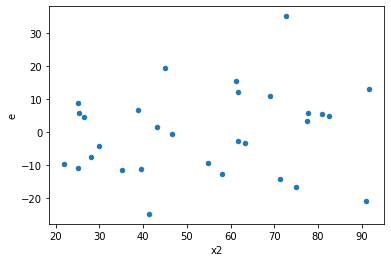

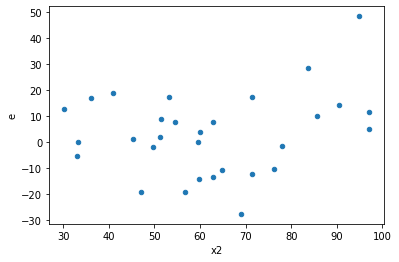

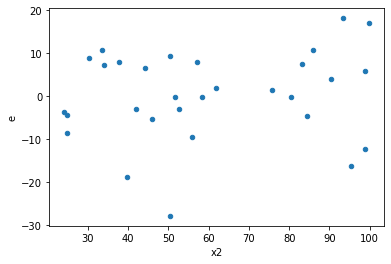

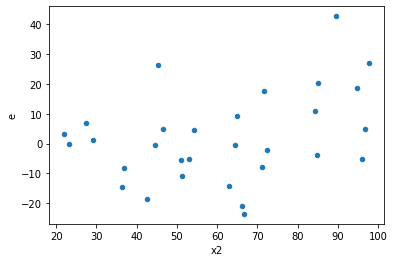

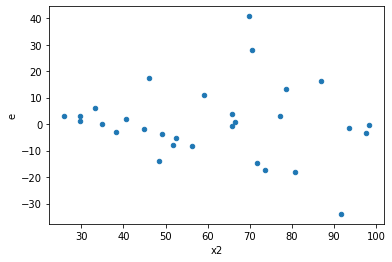

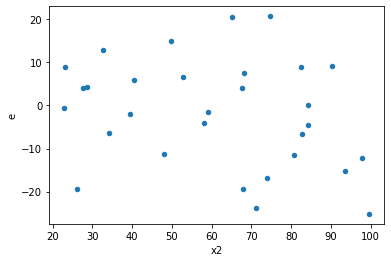

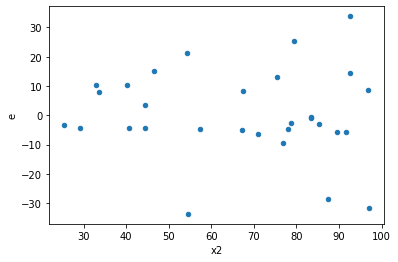

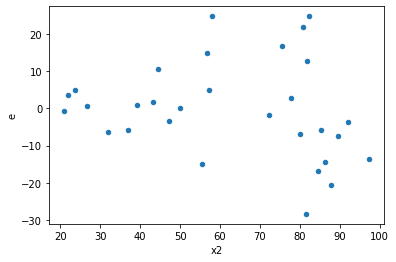

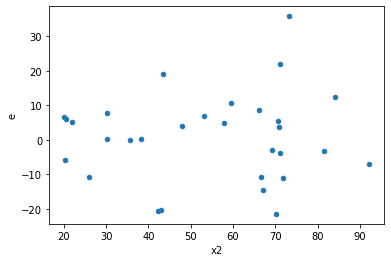

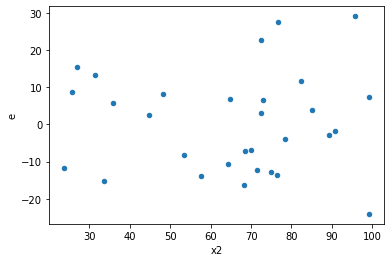

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,556.7699781029747,1544.0496880878782,69.59624726287184,193.00621101098477,2.773227273045074,0.17052144931340618,0.9147392753432969,0.08526072465670309,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,1242.7470875730346,2527.4993695129633,155.34338594662933,315.9374211891204,2.0338002758460902,0.33527797624105293,0.8323610118794735,0.16763898812052647,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,570.5484328764268,879.4108809950678,71.31855410955335,109.92636012438348,1.5413430838141249,0.5546046858134412,0.7226976570932794,0.2773023429067206,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,1064.1137183743995,2184.1654390863832,133.01421479679993,273.0206798857979,2.0525676921288434,0.32918444870406427,0.8354077756479679,0.16459222435203213,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,342.03562221564937,2240.0894256577208,42.75445277695617,280.0111782072151,6.5492869168035694,0.015427610929174884,0.9922861945354126,0.007713805464587442,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,881.4895228594645,1853.159931668305,110.18619035743306,231.64499145853813,2.1023051137996944,0.31366135498501313,0.8431693225074934,0.15683067749250656,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,1927.2843246326547,1964.026633758011,240.91054057908184,245.50332921975138,1.0190642909589167,0.9793471565738578,0.5103264217130711,0.4896735782869289,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,281.1280021743452,2087.2431343515564,35.14100027179315,260.90539179394455,7.424529460630269,0.010316189731876646,0.9948419051340617,0.005158094865938323,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,1041.6421118072415,1901.8538605816193,130.20526397590518,237.7317325727024,1.8258227456663756,0.41257844246927866,0.7937107787653607,0.20628922123463933,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,556.7699781029747,1544.0496880878782,69.59624726287184,193.00621101098477,2.773227273045074,0.17052144931340618,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,1242.7470875730346,2527.4993695129633,155.34338594662933,315.9374211891204,2.0338002758460902,0.33527797624105293,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,570.5484328764268,879.4108809950678,71.31855410955335,109.92636012438348,1.5413430838141249,0.5546046858134412,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,1064.1137183743995,2184.1654390863832,133.01421479679993,273.0206798857979,2.0525676921288434,0.32918444870406427,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,342.03562221564937,2240.0894256577208,42.75445277695617,280.0111782072151,6.5492869168035694,0.015427610929174884,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,881.4895228594645,1853.159931668305,110.18619035743306,231.64499145853813,2.1023051137996944,0.31366135498501313,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,1927.2843246326547,1964.026633758011,240.91054057908184,245.50332921975138,1.0190642909589167,0.9793471565738578,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,281.1280021743452,2087.2431343515564,35.14100027179315,260.90539179394455,7.424529460630269,0.010316189731876646,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,1041.6421118072415,1901.8538605816193,130.20526397590518,237.7317325727024,1.8258227456663756,0.41257844246927866,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      912
Reject001=0 : Heteroscedasticity     88
Name: Result_test, dtype: int64